In [1]:
import os
import numpy as np
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
import pandas as pd
import seaborn as sn
import torch

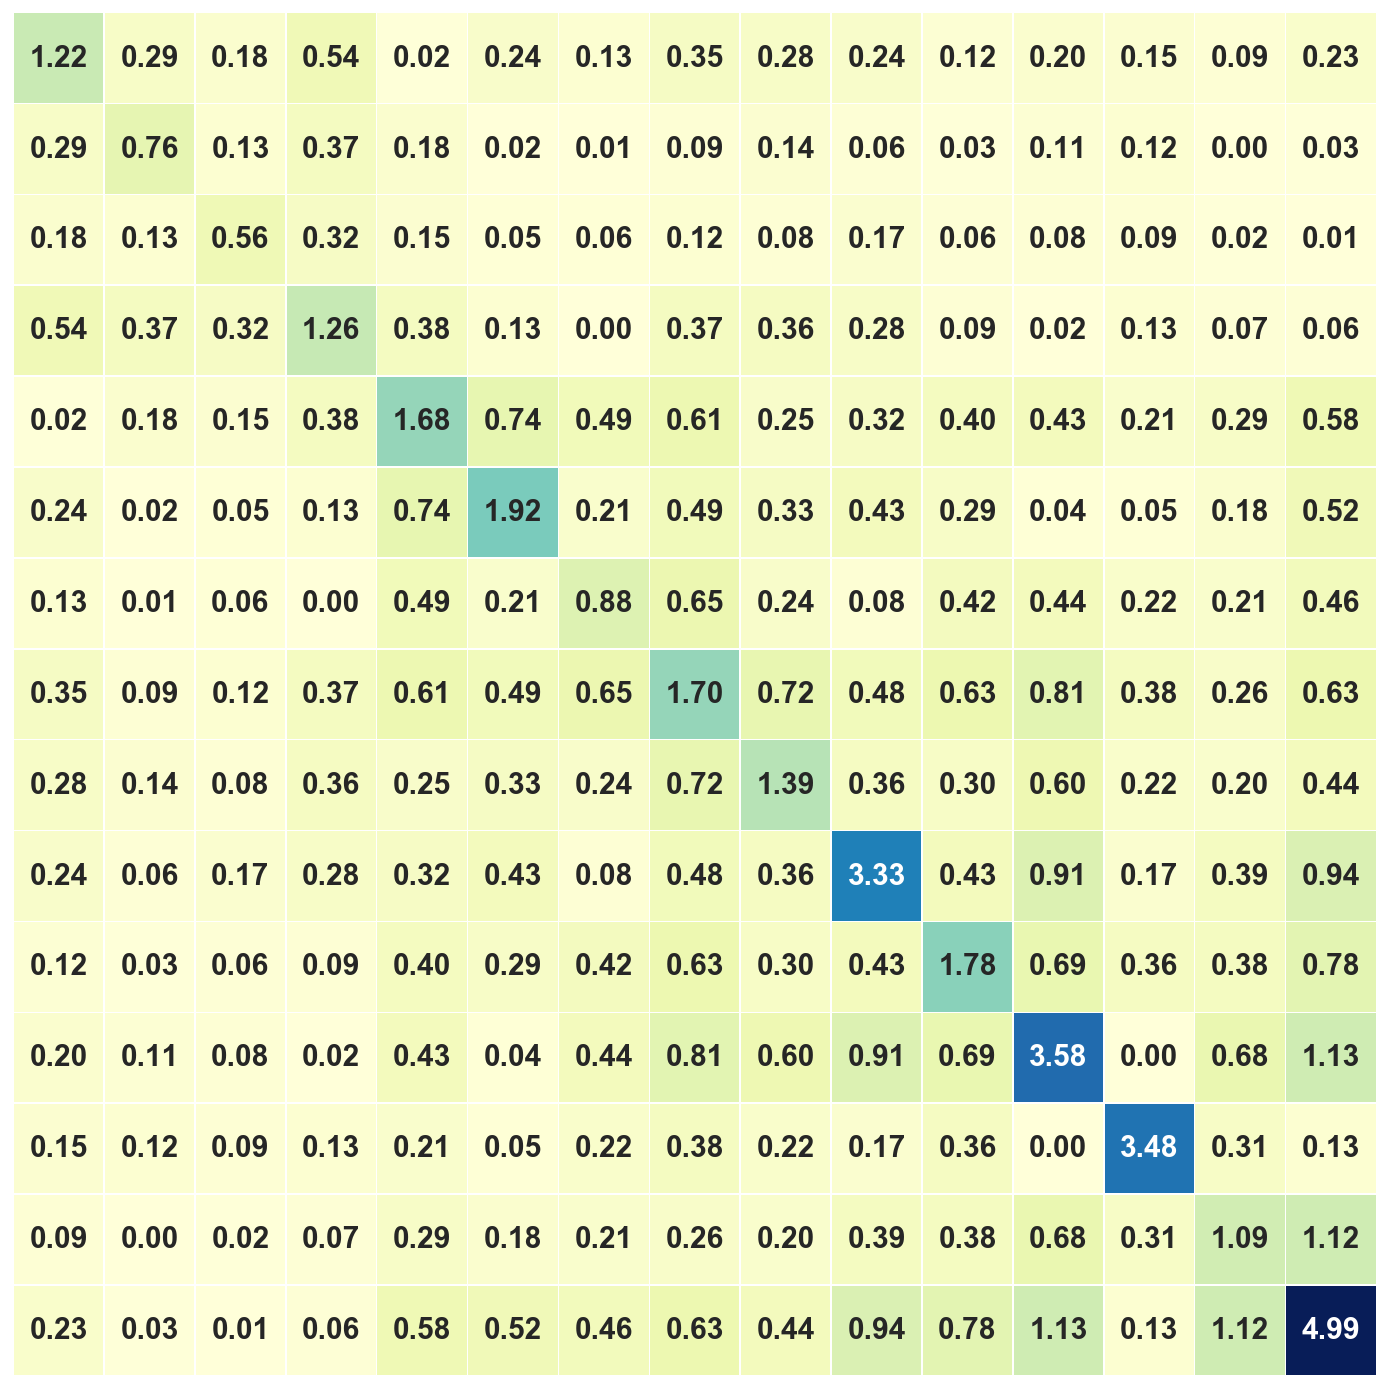

In [72]:
h_2bit_16 = [[ 1.2226e+00,  2.8816e-01,  1.7840e-01,  5.4358e-01, -2.4228e-02,
         -2.4013e-01, -1.3495e-01, -3.4926e-01, -2.8047e-01, -2.4494e-01,
         -1.1637e-01, -1.9542e-01, -1.5252e-01, -8.8157e-02, -2.2681e-01],
        [ 2.8816e-01,  7.5810e-01,  1.2686e-01,  3.7215e-01,  1.8271e-01,
          1.7963e-02,  1.1141e-02, -8.7305e-02, -1.4188e-01, -6.2382e-02,
          2.9702e-02, -1.0879e-01,  1.2236e-01, -2.7198e-03,  3.3567e-02],
        [ 1.7840e-01,  1.2686e-01,  5.5862e-01,  3.2413e-01,  1.5270e-01,
          5.4611e-02,  5.7099e-02, -1.2009e-01, -7.8867e-02, -1.7248e-01,
         -6.2305e-02, -7.9903e-02,  9.4136e-02,  2.1106e-02, -6.0568e-03],
        [ 5.4358e-01,  3.7215e-01,  3.2413e-01,  1.2602e+00,  3.8437e-01,
         -1.2697e-01, -7.1541e-04, -3.7362e-01, -3.6004e-01, -2.8119e-01,
         -8.9925e-02, -2.0208e-02, -1.2513e-01,  6.8679e-02,  6.3890e-02],
        [-2.4228e-02,  1.8271e-01,  1.5270e-01,  3.8437e-01,  1.6793e+00,
          7.3903e-01,  4.8961e-01,  6.1103e-01,  2.5314e-01,  3.1550e-01,
          4.0334e-01,  4.3469e-01,  2.0940e-01,  2.8991e-01,  5.8131e-01],
        [-2.4013e-01,  1.7963e-02,  5.4611e-02, -1.2697e-01,  7.3903e-01,
          1.9233e+00,  2.1038e-01,  4.8704e-01,  3.3243e-01,  4.3314e-01,
          2.8639e-01,  4.2587e-02,  4.5732e-02,  1.7994e-01,  5.1539e-01],
        [-1.3495e-01,  1.1141e-02,  5.7099e-02, -7.1541e-04,  4.8961e-01,
          2.1038e-01,  8.8018e-01,  6.4664e-01,  2.3808e-01,  7.9084e-02,
          4.2046e-01,  4.4156e-01,  2.2368e-01,  2.0646e-01,  4.5650e-01],
        [-3.4926e-01, -8.7305e-02, -1.2009e-01, -3.7362e-01,  6.1103e-01,
          4.8704e-01,  6.4664e-01,  1.6970e+00,  7.1947e-01,  4.7969e-01,
          6.3260e-01,  8.0993e-01,  3.8007e-01,  2.6458e-01,  6.3379e-01],
        [-2.8047e-01, -1.4188e-01, -7.8867e-02, -3.6004e-01,  2.5314e-01,
          3.3243e-01,  2.3808e-01,  7.1947e-01,  1.3928e+00,  3.6232e-01,
          2.9769e-01,  5.9711e-01,  2.2073e-01,  1.9775e-01,  4.4408e-01],
        [-2.4494e-01, -6.2382e-02, -1.7248e-01, -2.8119e-01,  3.1550e-01,
          4.3314e-01,  7.9084e-02,  4.7969e-01,  3.6232e-01,  3.3346e+00,
          4.3368e-01,  9.1464e-01, -1.7273e-01,  3.8741e-01,  9.3779e-01],
        [-1.1637e-01,  2.9702e-02, -6.2305e-02, -8.9925e-02,  4.0334e-01,
          2.8639e-01,  4.2046e-01,  6.3260e-01,  2.9769e-01,  4.3368e-01,
          1.7780e+00,  6.8803e-01,  3.5533e-01,  3.7828e-01,  7.8236e-01],
        [-1.9542e-01, -1.0879e-01, -7.9903e-02, -2.0208e-02,  4.3469e-01,
          4.2587e-02,  4.4156e-01,  8.0993e-01,  5.9711e-01,  9.1464e-01,
          6.8803e-01,  3.5750e+00, -4.5535e-03,  6.7789e-01,  1.1294e+00],
        [-1.5252e-01,  1.2236e-01,  9.4136e-02, -1.2513e-01,  2.0940e-01,
          4.5732e-02,  2.2368e-01,  3.8007e-01,  2.2073e-01, -1.7273e-01,
          3.5533e-01, -4.5535e-03,  3.4764e+00, -3.0902e-01, -1.2629e-01],
        [-8.8157e-02, -2.7198e-03,  2.1106e-02,  6.8679e-02,  2.8991e-01,
          1.7994e-01,  2.0646e-01,  2.6458e-01,  1.9775e-01,  3.8741e-01,
          3.7828e-01,  6.7789e-01, -3.0902e-01,  1.0900e+00,  1.1246e+00],
        [-2.2681e-01,  3.3567e-02, -6.0568e-03,  6.3890e-02,  5.8131e-01,
          5.1539e-01,  4.5650e-01,  6.3379e-01,  4.4408e-01,  9.3779e-01,
          7.8236e-01,  1.1294e+00, -1.2629e-01,  1.1246e+00,  4.9946e+00]]

sn.set(font_scale=2.5)
plt.rcParams['font.weight'] = 'bold'
rcParams['figure.figsize'] = 20, 20

df_cm = pd.DataFrame(h_2bit_16)
ax = sn.heatmap(df_cm.abs(), annot=True, cmap=cm.YlGnBu, fmt=".2f", xticklabels=False, yticklabels=False, cbar=False, linewidths=0.5, linecolor='white');
# ax = sn.heatmap(np.maximum(np.transpose(df_cm.abs() / np.diag(df_cm)), np.array(df_cm.abs() / np.diag(df_cm))), annot=True, cmap=cm.YlGnBu, fmt=".2f", xticklabels=False, yticklabels=False, cbar=False, linewidths=0.5, linecolor='white');
plt.tight_layout()
# plt.savefig('../../fig/resnet18_act_2bit_hessian.pdf')

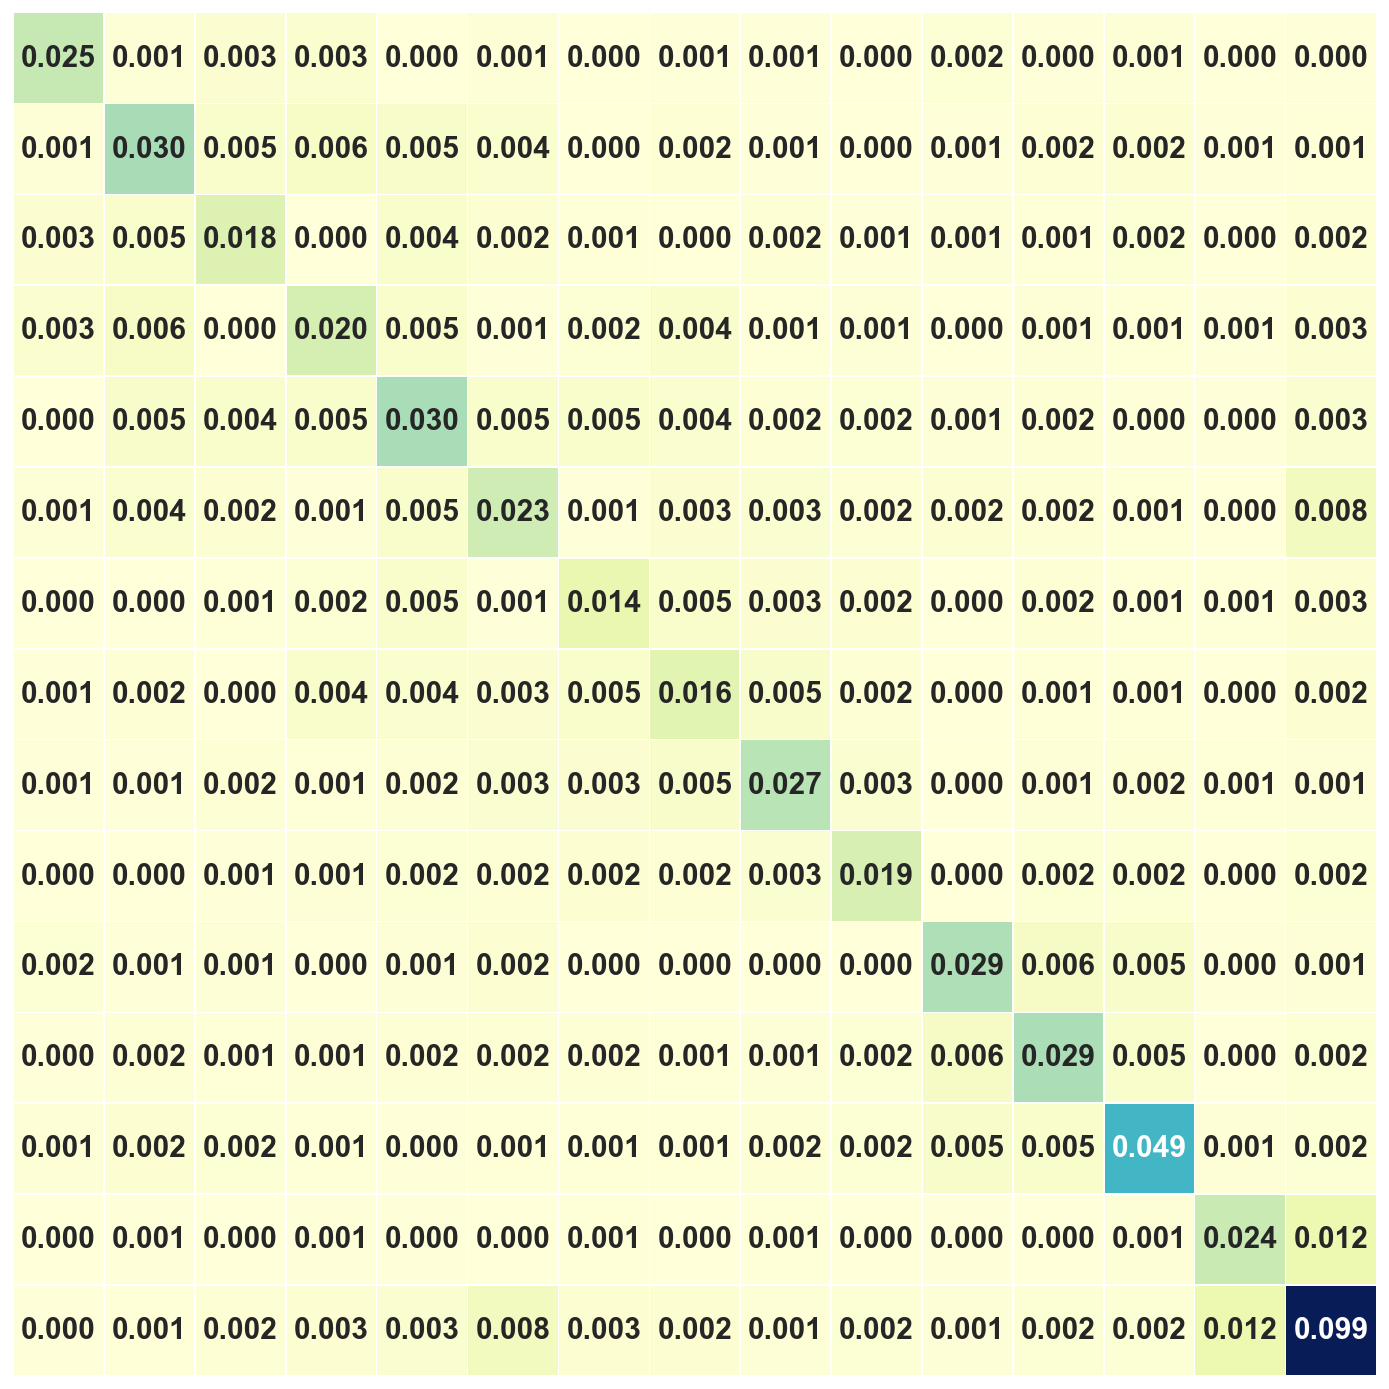

In [73]:
h_4bit_16 = [[ 2.4817e-02,  1.4574e-03,  2.8162e-03,  3.4866e-03, -9.1707e-05,
         -1.2832e-03, -2.6078e-04,  5.0745e-04, -6.8556e-04,  9.3030e-05,
          2.1680e-03,  4.0343e-04,  1.3742e-03,  3.1814e-04,  4.0421e-04],
        [ 1.4574e-03,  3.0110e-02, -4.5646e-03,  6.0182e-03,  4.7574e-03,
          3.5302e-03,  1.9929e-04,  1.6933e-03, -5.4197e-04,  2.9216e-04,
         -7.7605e-04, -1.8566e-03, -2.4055e-03,  7.4822e-04,  7.7646e-04],
        [ 2.8162e-03, -4.5646e-03,  1.8027e-02, -3.0563e-04, -3.9115e-03,
         -2.4686e-03, -8.3751e-04, -3.5815e-04,  1.6423e-03, -5.2581e-04,
          1.3251e-03,  1.0963e-03,  1.9913e-03, -3.1749e-04, -1.8148e-03],
        [ 3.4866e-03,  6.0182e-03, -3.0563e-04,  2.0169e-02,  4.5705e-03,
          5.0720e-04,  2.0436e-03,  3.9559e-03, -1.0285e-03,  1.2442e-03,
          6.0960e-06, -1.3412e-03,  9.9960e-04,  6.6800e-04,  2.5087e-03],
        [-9.1707e-05,  4.7574e-03, -3.9115e-03,  4.5705e-03,  3.0037e-02,
          4.6098e-03,  4.5144e-03,  3.7749e-03,  1.6048e-03,  2.1688e-03,
         -1.1962e-03,  1.7084e-03,  3.9466e-04,  4.2925e-04,  3.1375e-03],
        [-1.2832e-03,  3.5302e-03, -2.4686e-03,  5.0720e-04,  4.6098e-03,
          2.2670e-02,  5.2515e-04,  2.7134e-03,  3.1305e-03,  1.7033e-03,
         -2.3354e-03,  1.6417e-03,  7.9317e-04,  2.2695e-05,  8.1958e-03],
        [-2.6078e-04,  1.9929e-04, -8.3751e-04,  2.0436e-03,  4.5144e-03,
          5.2515e-04,  1.3756e-02,  4.5209e-03,  3.0105e-03,  2.4079e-03,
          3.0365e-04,  1.7582e-03, -9.1734e-04,  8.9643e-04,  2.5240e-03],
        [ 5.0745e-04,  1.6933e-03, -3.5815e-04,  3.9559e-03,  3.7749e-03,
          2.7134e-03,  4.5209e-03,  1.6128e-02,  4.7528e-03,  1.8825e-03,
         -1.4057e-04,  9.8719e-04, -9.0188e-04,  1.8438e-04,  2.4966e-03],
        [-6.8556e-04, -5.4197e-04,  1.6423e-03, -1.0285e-03,  1.6048e-03,
          3.1305e-03,  3.0105e-03,  4.7528e-03,  2.7131e-02,  3.2466e-03,
          1.9100e-04,  1.3337e-03,  1.6223e-03,  9.3251e-04,  1.4357e-03],
        [ 9.3030e-05,  2.9216e-04, -5.2581e-04,  1.2442e-03,  2.1688e-03,
          1.7033e-03,  2.4079e-03,  1.8825e-03,  3.2466e-03,  1.9362e-02,
         -5.4829e-05,  2.2857e-03,  1.9485e-03,  2.6691e-04,  1.9451e-03],
        [ 2.1680e-03, -7.7605e-04,  1.3251e-03,  6.0960e-06, -1.1962e-03,
         -2.3354e-03,  3.0365e-04, -1.4057e-04,  1.9100e-04, -5.4829e-05,
          2.9071e-02,  6.1870e-03,  4.6922e-03,  4.2659e-04, -1.2216e-03],
        [ 4.0343e-04, -1.8566e-03,  1.0963e-03, -1.3412e-03,  1.7084e-03,
          1.6417e-03,  1.7582e-03,  9.8719e-04,  1.3337e-03,  2.2857e-03,
          6.1870e-03,  2.9280e-02,  4.5530e-03, -1.9638e-04,  2.0140e-03],
        [ 1.3742e-03, -2.4055e-03,  1.9913e-03,  9.9960e-04,  3.9466e-04,
          7.9317e-04, -9.1734e-04, -9.0188e-04,  1.6223e-03,  1.9485e-03,
          4.6922e-03,  4.5530e-03,  4.9247e-02, -1.3908e-03,  2.1429e-03],
        [ 3.1814e-04,  7.4822e-04, -3.1749e-04,  6.6800e-04,  4.2925e-04,
          2.2695e-05,  8.9643e-04,  1.8438e-04,  9.3251e-04,  2.6691e-04,
          4.2659e-04, -1.9638e-04, -1.3908e-03,  2.3850e-02,  1.2375e-02],
        [ 4.0421e-04,  7.7646e-04, -1.8148e-03,  2.5087e-03,  3.1375e-03,
          8.1958e-03,  2.5240e-03,  2.4966e-03,  1.4357e-03,  1.9451e-03,
         -1.2216e-03,  2.0140e-03,  2.1429e-03,  1.2375e-02,  9.8573e-02]]

sn.set(font_scale=2.5)
plt.rcParams['font.weight'] = 'bold'
rcParams['figure.figsize'] = 20, 20

df_cm = pd.DataFrame(h_4bit_16)
ax = sn.heatmap(df_cm.abs(), annot=True, cmap=cm.YlGnBu, fmt=".3f", xticklabels=False, yticklabels=False, cbar=False, linewidths=0.5, linecolor='white');
# ax = sn.heatmap(np.maximum(np.transpose(df_cm.abs() / np.diag(df_cm)), np.array(df_cm.abs() / np.diag(df_cm))), annot=True, cmap=cm.YlGnBu, fmt=".2f", xticklabels=False, yticklabels=False, cbar=False, linewidths=0.5, linecolor='white');
plt.tight_layout()
# plt.savefig('../../fig/resnet18_act_4bit_hessian.pdf')